SCENARIO

You have been hired as a data analyst for a retail company called "Superstore Sales". Your task is to
analyse the sales data and provide actionable insights to improve business performance. The
company wants to understand the factors that drive sales and identify customer segments for
targeted marketing strategies.

Answer the following questions:

In [48]:
# load dataset

import numpy as numpy
import pandas as pd

In [49]:
df = pd.read_excel('Sales_Data.xlsx')

In [50]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales$,Discount$
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,13.09800
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,36.59700
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,1.90060
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,57.45465
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,3.35520


In [51]:
df.shape

(9800, 19)

In [52]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales$', 'Discount$'],
      dtype='object')

In [53]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales$            6
Discount$         0
dtype: int64

In [54]:
df.duplicated().sum()

0

In [96]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Order Date'])

# Create a new feature 'Month_Name' by extracting the month name from the 'Date' column
df['Month'] = df['Order Date'].dt.strftime('%B')

# Print the DataFrame with the new 'Month_Name' column
print(df)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2017-152156 2017-11-08 2017-11-11    Second Class   
1          2  CA-2017-152156 2017-11-08 2017-11-11    Second Class   
2          3  CA-2017-138688 2017-06-12 2017-06-16    Second Class   
3          4  US-2016-108966 2016-10-11 2016-10-18  Standard Class   
4          5  US-2016-108966 2016-10-11 2016-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9795    9796  CA-2017-125920 2017-05-21 2017-05-28  Standard Class   
9796    9797  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   
9797    9798  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   
9798    9799  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   
9799    9800  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson 

In [97]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales$,Discount$,Date,Month_Name,Ship_Mode_Num,Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,13.09800,2017-11-08,November,NaN,November
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,36.59700,2017-11-08,November,NaN,November
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,1.90060,2017-06-12,June,NaN,June
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,57.45465,2016-10-11,October,NaN,October
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,3.35520,2016-10-11,October,NaN,October


1. Calculate the total sales revenue for the entire dataset.

In [98]:
total_revenue = df['Sales$'].sum()
print("total_revenue for sales is", total_revenue)

total_revenue for sales is 2259609.8466999996


2. Identify the top-selling products and product categories based on sales.

In [99]:
# Identify the top-selling products and product categories based on sales
top_selling_products = df.groupby(['Category', 'Product Name'])['Sales$'].sum().reset_index()
top_selling_products = top_selling_products.sort_values(by='Sales$', ascending=False)

# Print the top-selling products and product categories
print("Top-Selling Products and Categories:")
print(top_selling_products)

Top-Selling Products and Categories:
             Category                                       Product Name  \
1493       Technology              Canon imageCLASS 2200 Advanced Copier   
774   Office Supplies  Fellowes PB500 Electric Punch Plastic Comb Bin...   
1512       Technology  Cisco TelePresence System EX90 Videoconferenci...   
206         Furniture       HON 5400 Series Task Chairs for Big and Tall   
803   Office Supplies         GBC DocuBind TL300 Electric Binding System   
...               ...                                                ...   
847   Office Supplies                                Grip Seal Envelopes   
1392  Office Supplies                                           Xerox 20   
534   Office Supplies                                            Avery 5   
741   Office Supplies  Eureka Disposable Bags for Sanitaire Vibra Gro...   
1574       Technology  ImationÂ Secure+ Hardware Encrypted USB 2.0Â F...   

         Sales$  
1493  61599.824  
774   27453.38

In [100]:
top_selling_products.head(3)

,Category,Product Name,Sales$
1493,Technology,Canon imageCLASS 2200 Advanced Copier,61599.824
774,Office Supplies,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
1512,Technology,Cisco TelePresence System EX90 Videoconferenci...,22638.480


3. Group the sales by month and make a plot of the total monthly sales. is it increasing, decreasing,
or is it steady?

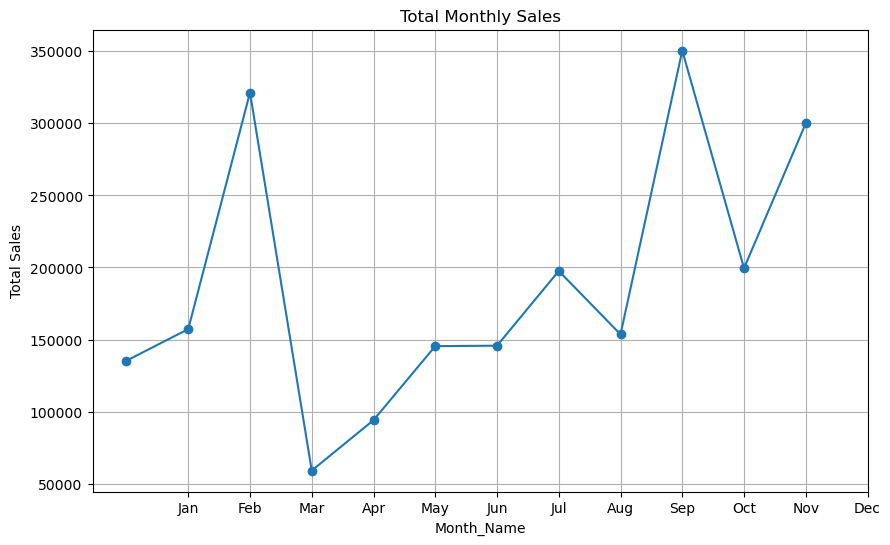

In [101]:
import matplotlib.pyplot as plt

# Group the data by month and calculate the total sales for each month
monthly_sales = df.groupby('Month_Name')['Sales$'].sum()

# Plot the total monthly sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Total Monthly Sales')
plt.xlabel('Month_Name')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

the trend is increasing

4. Explore the correlation between sales and discount, and shipping cost.

In [102]:
# Encode ship mode into numerical values
df['Ship_Mode_Num'] = df['Ship Mode'].map({'Standard': 0, 'Express': 1})

# Calculate the correlation matrix
correlation_matrix = df[['Sales$', 'Discount$']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             Sales$  Discount$
Sales$     1.000000   0.904085
Discount$  0.904085   1.000000


5. Make a histogram of the sales. does it look like a normal distribution?

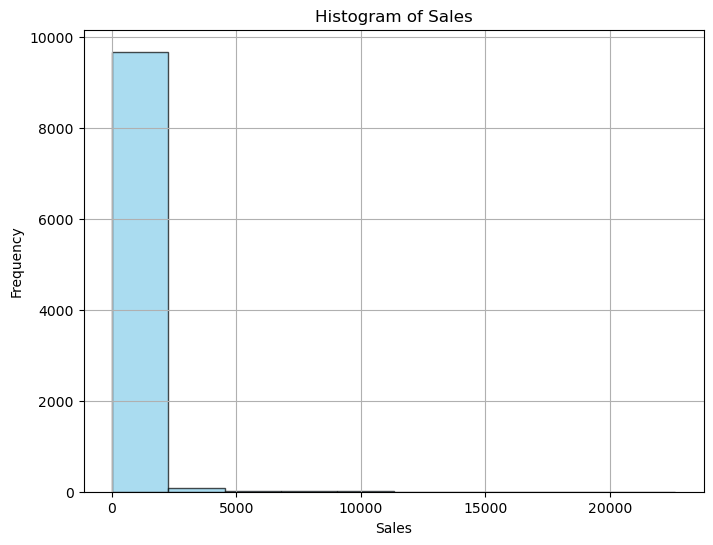

In [103]:
# Plot a histogram of the sales
plt.figure(figsize=(8, 6))
plt.hist(df['Sales$'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

no it dosnt look like a normal distribution to me

6. What is the mean discount for the consumer segment?

In [104]:
# Filter the data for the consumer segment
consumer_data = df[df['Segment'] == 'Consumer']

# Calculate the mean discount for the consumer segment
mean_discount_consumer = consumer_data['Discount$'].mean()

# Print the mean discount for the consumer segment
print("Mean Discount for the Consumer Segment:", mean_discount_consumer)

Mean Discount for the Consumer Segment: 23.063994351891786


7.Compute the standard deviation of the sale for each segment. Which one has more variability in
the sales?

In [105]:
# Compute the standard deviation of sales for each segment
std_dev_sales_by_segment = df.groupby('Segment')['Sales$'].std()

# Print the standard deviation of sales for each segment
print("Standard Deviation of Sales by Segment:")
print(std_dev_sales_by_segment)

Standard Deviation of Sales by Segment:
Segment
Consumer       588.990759
Corporate      600.204510
Home Office    763.710864
Name: Sales$, dtype: float64


Based on above output the segment with the highest standard deviation of sales is "Home Office" with a standard deviation of approximately 763.71. This indicates that the sales data for the "Home Office" segment has more variability compared to the other segments.

8. Using bar charts, visualize the total sales by category

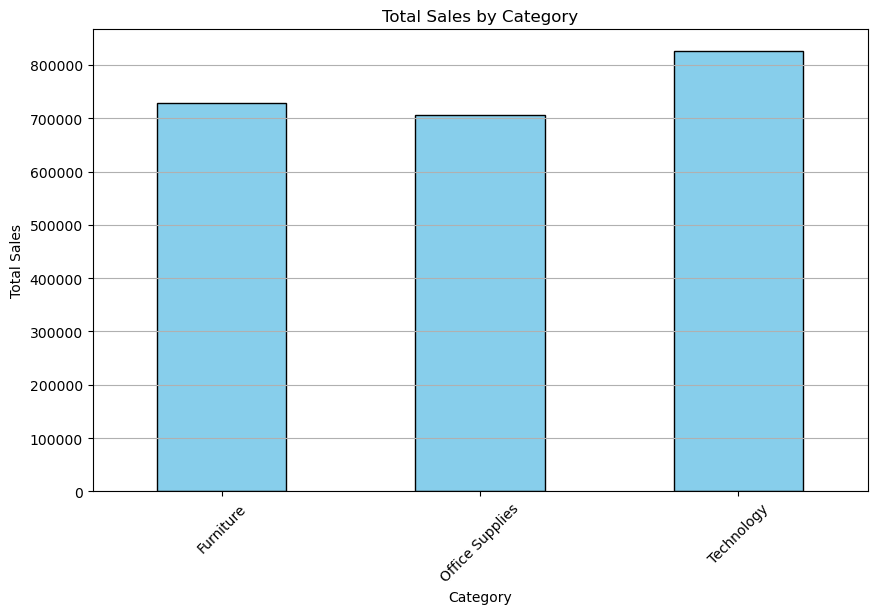

In [106]:
# Calculate the total sales by category
total_sales_by_category = df.groupby('Category')['Sales$'].sum()

# Plot the total sales by category using a bar chart
plt.figure(figsize=(10, 6))
total_sales_by_category.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

9. Use a bar chart to visualize the number of sales per ship mode.

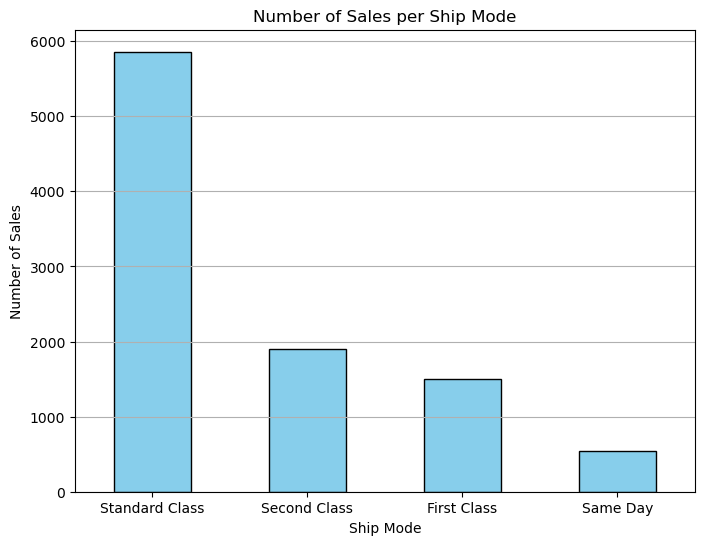

In [107]:
# Count the number of sales per ship mode
sales_per_ship_mode = df['Ship Mode'].value_counts()

# Plot the number of sales per ship mode using a bar chart
plt.figure(figsize=(8, 6))
sales_per_ship_mode.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Sales per Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Number of Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

10. Identify the top three regions with the highest sales in the period 2017-2018.

In [108]:
# Filter the data for the period 2017-2018
sales_2017_2018 = df[(df['Date'].dt.year >= 2017) & (df['Date'].dt.year <= 2018)]

# Group the filtered data by region and calculate the total sales for each region
total_sales_by_region = sales_2017_2018.groupby('Region')['Sales$'].sum()

# Sort the regions based on their total sales in descending order
sorted_regions = total_sales_by_region.sort_values(ascending=False)

# Select the top three regions with the highest sales
top_three_regions = sorted_regions.head(3)

# Print the top three regions with the highest sales
print("Top Three Regions with Highest Sales (2017-2018):")
print(top_three_regions)

Top Three Regions with Highest Sales (2017-2018):
Region
West       430602.1540
East       388640.7240
Central    286600.5162
Name: Sales$, dtype: float64
